# Название проекта: Исследование продаж интернет-магазина «Стримчик»

**Описание исследования.**

Получены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) с 1980 до 2016 года. 

**Цель исследования.**

Нужно выявить определяющие успешность игры закономерности. Выявить популярные у пользователей платформы и жанры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий 2017 год.

**Задачи исследования.**

- выгрузить датасеты и изучить по ними общую информацию;
- проверить на наличие пропущенных значений и дубликатов;
- провести исследовательский анализ данных;
- проверить гипотезы, поставленные продакт-менеджерами;
- сделать выводы и рекомендации.

**Исходные данные.**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В наборе данных есть аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***

* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

***Часть 2. Подготовка данных***

* [1. Замена названий столбцов](#2-bullet)
* [2. Обработка пропусов и дубликатов](#3-bullet)
* [3. Преобразование данных в нужные типы данных](#4-bullet)
* [4. Проверка аномалий](#5-bullet)

***Часть 3. Проведение исследовательского анализа данных***

* [1. Выпуск игр в разные годы](#6-bullet)
* [2. Продажи по платформам в разные годы](#7-bullet)
* [3. Выбор актуального периода для проведения исследования](#8-bullet)
* [4. Влияние на продажи платформ отзывов пользователей и критиков](#9-bullet)
* [5. Распределение игр по жанрам](#10-bullet)

***Часть 4. Сформируем портрет пользователя каждого региона***

* [1. Самые популярные платформы (топ-5) в регионах](#11-bullet)
* [2. Самые популярные жанры (топ-5 в регионах)](#12-bullet)
* [3. Влияние рейтинга ESRB на продажи в отдельном регионе](#13-bullet)

***Часть 6. Проверка гипотез***

* [1. Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#14-bullet)
* [2. Гипотеза: Гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные](#15-bullet)

[***ВЫВОД***](#16-bullet)

In [1]:
# импортируем библиотеки Pyhton для проведения исследования
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
from math import factorial
from scipy.stats import binom, norm

<a id='1-bullet'></a>
## Шаг. Загрузка данных

### Считывание CSV-файлов с данными с помощью библиотеки pandas

In [2]:
# считали файл из csv-файла games.csv в переменную data
try:
    data = pd.read_csv('games.csv') 
except:
    data = pd.read_csv('/datasets/games.csv')

### Вывод и изучение общей информации о датафрейме

In [3]:
# создали функцию для просмотра и вывода информации датафрейма
def info(df):
    return df.head(10), df.info(), df.isna().sum(), df.duplicated(subset=['Name', 'Platform']).sum();

In [4]:
info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(                        Name Platform  Year_of_Release         Genre  \
 0                 Wii Sports      Wii           2006.0        Sports   
 1          Super Mario Bros.      NES           1985.0      Platform   
 2             Mario Kart Wii      Wii           2008.0        Racing   
 3          Wii Sports Resort      Wii           2009.0        Sports   
 4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
 5                     Tetris       GB           1989.0        Puzzle   
 6      New Super Mario Bros.       DS           2006.0      Platform   
 7                   Wii Play      Wii           2006.0          Misc   
 8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
 9                  Duck Hunt      NES           1984.0       Shooter   
 
    NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
 0     41.36     28.96      3.77         8.45          76.0          8      E  
 1     29.08      3.58      6.81   

В рассматриваемом датафрейме 11 столбцов и 16715 строк. Есть пропущенные значения в столбцах Name, Year_of_Release, Critic_Score, User_Score, Rating. Дубликаты найдены в столбцах Имя - Игровая консоль. В столбце Year_of_Release — год выпуска, тип данных вещественный с плавающей точкой. В столбце User_Score — оценка пользователей (максимум 10), тип данных стройный.

## Шаг. Предобработка данных

<a id ='2-bullet'></a>
### Замена названий столбцов

Необходимо заменить названия столбцов, привести к нижнему регистру для удобства использования в исследовании

In [5]:
data.columns# перечень названий столбцов таблицы data

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# переименовали столбцы, привели к нижнему регистру
data = data.rename(
    columns={
        'Name': 'name', 
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre', 
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

In [7]:
data.columns # проверили результат - перечень названий столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id ='3-bullet'></a>
### Обработка пропусков и дубликатов

In [8]:
# вывели изначальное количество строк в датафрейме
before = data.shape[0]
before

16715

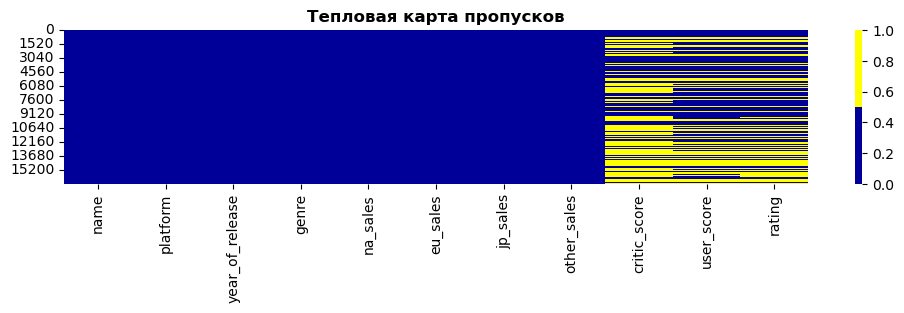

In [9]:
# построли тепловую карту пропусков
cols = data.columns # записали признаки в переменную cols
# определили цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
plt.subplots(figsize=(12, 2))
sns.heatmap(data[cols].isnull(), 
            cmap=sns.color_palette(colours))
plt.title('Тепловая карта пропусков',
         fontsize=12, 
         weight='bold')
plt.show()

In [10]:
# процентное соотношение количества пропусков
skip = data.isna().sum() 
for index in range(len(skip)):
    print('Пропущено значений в столбцe {} - {:.1%}'.format(cols[index], skip[index] / before))

Пропущено значений в столбцe name - 0.0%
Пропущено значений в столбцe platform - 0.0%
Пропущено значений в столбцe year_of_release - 1.6%
Пропущено значений в столбцe genre - 0.0%
Пропущено значений в столбцe na_sales - 0.0%
Пропущено значений в столбцe eu_sales - 0.0%
Пропущено значений в столбцe jp_sales - 0.0%
Пропущено значений в столбцe other_sales - 0.0%
Пропущено значений в столбцe critic_score - 51.3%
Пропущено значений в столбцe user_score - 40.1%
Пропущено значений в столбцe rating - 40.5%


In [11]:
# вывели пропущенные значения в столбце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# вывели уникальные значения в столбце year_of_release
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
# посчитали сколько всего млн.копий продано за все время
data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns').sum()

8915.71

In [14]:
#посчитали сколько млн.копий продано в пропущенных значениях в столбце год релиза игры
data[(data['year_of_release'].isna())][['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns').sum()

98.91999999999999

In [15]:
# посчитали в процентах сколько продаж можем потерять если удалим строки с пропущенными значеними в столбце год релиза
data[(data['year_of_release'].isna())][['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns').sum() \
/ data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns').sum() * 100

1.109502215751746

In [16]:
#сохранили в отдельный датафрейм выборку с пропущенными значениями в столбце год релиза
#при необходимости сможем вернуться
data_release = data[(data['year_of_release'].isna())]
data_release.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [17]:
# удалили строки с пропущенными значениями в столбцах name, year_of_release
data = data.dropna(subset=['name', 'year_of_release'])

In [18]:
#посмотрели уникальные значения в столбце user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd в играх означает to be determined = будет определено. Заменим данное значение на Nan

In [19]:
# заменили значение tbd на nan в столбце user_score
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [20]:
# заменили пропущенные значение в столбце rating на unknown
data['rating'] = data['rating'].fillna('unknown')

In [21]:
# проверили пропущенные значения в столбцах
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [22]:
# вывели дубликаты в датафрейме по столбцам name и platform
data[data.duplicated(keep=False, subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Дубликаты отличаются только в годе релиза и продажами в некотором регионе. Можно предположить, что образовались из-за выхода игры а конкретном регионе в определенном году. Из-за малого количества дубликатов, оставим их как есть, данные по ним не смогут повлиять на исследование.

In [23]:
# вывели количество строк после удалений
after = data.shape[0]
after

16444

In [24]:
print(f'Потеряли значений после обработки пропусков - {(1 - after/before):.1%}')

Потеряли значений после обработки пропусков - 1.6%


На данном этапе привели названия столбцов к нижнему регистру для удобства использования в исследовании. Удалили пропущенные значения в столбцах name и year_of_release из-за невозможности восстановить данные. В столбце rating заменили пропущенные значения на unknown. В столбцах critic_score и user_score оставили пропущенные значения незаполненными. Значение tbd (отсутствие рейтинга) заменили nan (пропущенные значения). Пропущенные значения могли возникнуть из-за технических сложностей при выгрузке, либо в целом из-за отсутствия данных. Можно предположить, что некоторые игры могли не оцениваться и не получать рейтинг. Издатель не захотел получать рейтинговую оценку ESRB, критики оценивали только определенные игры, либо была возможность оценить только определенные игры.

<a id ='4-bullet'></a>
### Преобразование данных в нужные типы данных

In [25]:
# преобразовали тип данных в столбце year_of_release на целочисленный формат
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year

In [26]:
# проверили за какой период собраны данные
print('Начало периода:', data['year_of_release'].min())
print('Конец периода:', data['year_of_release'].max())

Начало периода: 1980
Конец периода: 2016


In [27]:
# заменили тип данных с float64 на float32 для экономии памяти
for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']:
    data[col] = data[col].astype('float32')

In [28]:
# проверили тип данных в столбцах data
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score       float32
user_score         float32
rating              object
dtype: object

### Суммарные продажи во всех регионах

In [29]:
# определили суммарные продажи во всех регионах и записали данные в отдельный столбец
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

In [30]:
# заменили тип данных для экономии памяти
data['total_sales'] = data['total_sales'].astype('float32')

In [31]:
# проверили типы данных в столбцах
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score       float32
user_score         float32
rating              object
total_sales        float32
dtype: object

In [32]:
#вывели таблицу с новым столбцом
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,unknown,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,unknown,31.380001


На данном этапе привели данные к нужному типу данных, необходимо для проведения корректных расчетов в исследовании.

<a id ='5-bullet'></a>
### Проверка аномалий

In [33]:
#проверили столбец platform на уникальные значения
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [34]:
#проверили столбец genre на уникальные значения
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [35]:
#проверили столбец rating на уникальные значения
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
- **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.
- **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально **"K-A" ("Kids to Adults")**
- **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.
- **«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- **«M» («Mature»)** — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
- **«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
- **«RP» («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- **unknown** - заполнили пропущенные значения, пропуски возникли либо из-за технических сложностей, либо игра не направлялась на получение рейтинга.

In [36]:
# проверили статистику столбца critic_score - должна быть в диапазоне от 0 до 100
data['critic_score'].describe()

count    7983.000000
mean       68.994362
std        13.920051
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [37]:
# проверили статистику столбца user_score - должна быть в диапазоне от 0 до 10
data['user_score'].describe()

count    7463.000000
mean        7.126329
std         1.499448
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [38]:
#обнаружили артефакт по платформе DS - консоль появилась в 2014 году
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


In [39]:
#вывели количество строк в датафрейме
data.shape[0]

16444

In [40]:
# удалили артефакт
data = data[~((data['platform'] == 'DS') & (data['year_of_release'] == 1985))]

In [41]:
#проверили, что удалилась одна строка
data.shape[0]

16443

В данном разделе предобработали данные и проверили предварительный анализ данных. Частично удалили пропуски, преобразовали тип данных. Привели назавания столбцов в соответствии со стандартом PEP8. Посмотрели на дубликаты. Проверили, что нет выбросов и неординарных значений в данных. Вывели уникальные значения в столбцах platform, genre и rating для подтверждения, что нет ничего лишнего. Посмотрели на статистику по столбцам critic_score и user_score, на выявление, что оценки не выходят за рамки отмеренного для них диапазона.

## Шаг. Исследовательский анализ данных

<a id ='6-bullet'></a>
### Выпуск игр в разные годы

 Посмотрим, сколько игр выпускалось в разные годы. Чтобы получить истинное количество «игр по годам» исключим дубликаты, когда одна и таже игра перевыпускалась на разных платформах.

In [42]:
# вывели дубликаты в датафрейме по столбцам name и platform
data[data.duplicated(keep=False, subset=['name', 'year_of_release'])].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.049999
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.270000
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.730000
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.630000
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.620000
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.789999
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.679999
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.470000
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.330000
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.629999


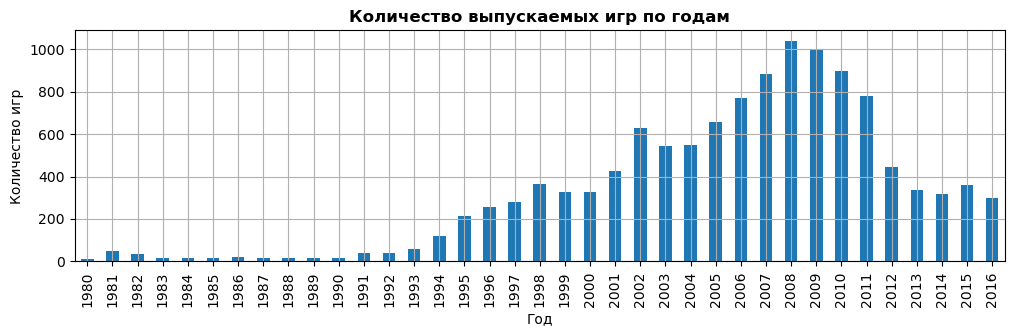

In [43]:
# нарисовали график выпуска игр в разные годы за исключением дубликатов выпуска одной и той же игры на разных платформах
data_name = data[~data.duplicated(subset=['name', 'year_of_release'])].pivot_table(index='year_of_release', 
                             values='name', 
                             aggfunc='count')
data_name.plot(kind='bar', 
               grid=True, 
               figsize=(12, 3), 
               legend=False)
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.title('Количество выпускаемых игр по годам',
         fontsize=12, 
         weight='bold')
plt.show()

In [44]:
# вывели статистику по количеству игр
data_name['name'].describe()

count      37.000000
mean      329.567568
std       319.163015
min         9.000000
25%        36.000000
50%       297.000000
75%       546.000000
max      1039.000000
Name: name, dtype: float64

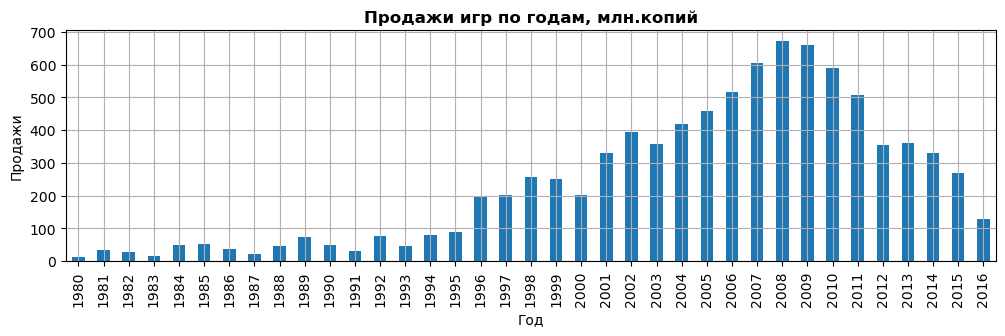

In [45]:
#нарисовали график продажи игр (млн.копий) в разные годы
data_sales = data.pivot_table(index='year_of_release', 
                              values='total_sales', 
                              aggfunc='sum')
data_sales.plot(kind='bar', 
                grid=True, 
                figsize=(12, 3), 
                legend=False)
plt.ylabel('Продажи')
plt.xlabel('Год')
plt.title('Продажи игр по годам, млн.копий',
         fontsize=12, 
         weight='bold')
plt.show()

Из графиков можно наблюдать, что до 1994 года выпуск и продажи игр находились на минимальных уровнях. После 1994 и до 2008 года начинается бум выпуска и продаж новых игр. В это время начинается массовое производство микроэлектроники, производство компютеров. В это же время зарождаются компании по производству консолей Nintendo, Xbox, PlayStation - которые стимулирует разработку новых игр и продвигают их на рынке. Плюс у молодежи становится популярным играть игры на приставке или за ПК.  После 2008 года видим спад индустрии, количество выпускаех игр и продажи снижаются. Выпуск игр стабилизировался приблизительно на одном уровне с 2014 года, продажи тем не менее снижались.

<a id ='7-bullet'></a>
### Продажи по платформам в разные годы

Посмотрим, как менялись продажи по платформам. Построим распределение продаж по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

In [46]:
# определили присутствие платформ по годам и количеству выпущенных игр
for platform in data['platform'].sort_values().unique():
    print('Платформа', platform,
          'количество лет на рынке', 
          len(data[data['platform'] == platform]['year_of_release'].sort_values().unique()))
    print('Годы присутствия', data[data['platform'] == platform]['year_of_release'].sort_values().unique())
    print('Выпущено игр', len(data[data['platform'] == platform]['name'].unique()))
    print()

Платформа 2600 количество лет на рынке 10
Годы присутствия [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989]
Выпущено игр 116

Платформа 3DO количество лет на рынке 2
Годы присутствия [1994 1995]
Выпущено игр 3

Платформа 3DS количество лет на рынке 6
Годы присутствия [2011 2012 2013 2014 2015 2016]
Выпущено игр 512

Платформа DC количество лет на рынке 7
Годы присутствия [1998 1999 2000 2001 2002 2007 2008]
Выпущено игр 52

Платформа DS количество лет на рынке 10
Годы присутствия [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]
Выпущено игр 2120

Платформа GB количество лет на рынке 13
Годы присутствия [1988 1989 1990 1991 1992 1994 1995 1996 1997 1998 1999 2000 2001]
Выпущено игр 97

Платформа GBA количество лет на рынке 8
Годы присутствия [2000 2001 2002 2003 2004 2005 2006 2007]
Выпущено игр 811

Платформа GC количество лет на рынке 7
Годы присутствия [2001 2002 2003 2004 2005 2006 2007]
Выпущено игр 542

Платформа GEN количество лет на рынке 5
Годы присутствия [1990 1991 1992

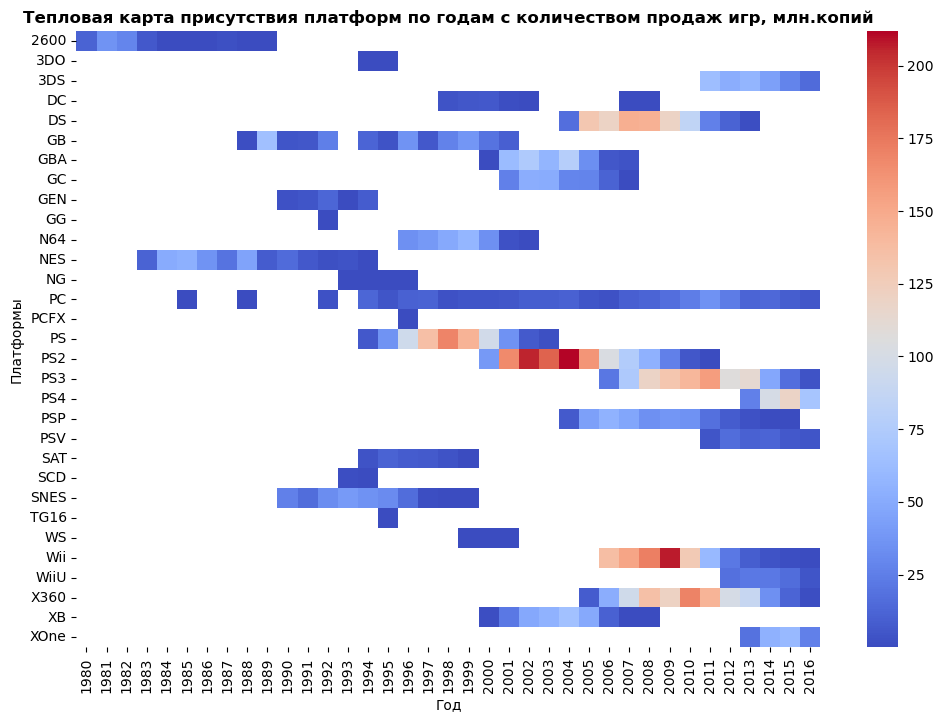

In [47]:
# построили тепловую карту присутствия платформ по годам с продажами
data_platform = data.pivot_table(index='platform', 
                                 columns='year_of_release', 
                                 values='total_sales', 
                                 aggfunc='sum')
plt.subplots(figsize=(12, 8))
sns.heatmap(data_platform, 
            cmap='coolwarm')
plt.ylabel('Платформы')
plt.xlabel('Год')
plt.title('Тепловая карта присутствия платформ по годам с количеством продаж игр, млн.копий',
         fontsize=12, 
         weight='bold')
plt.show()

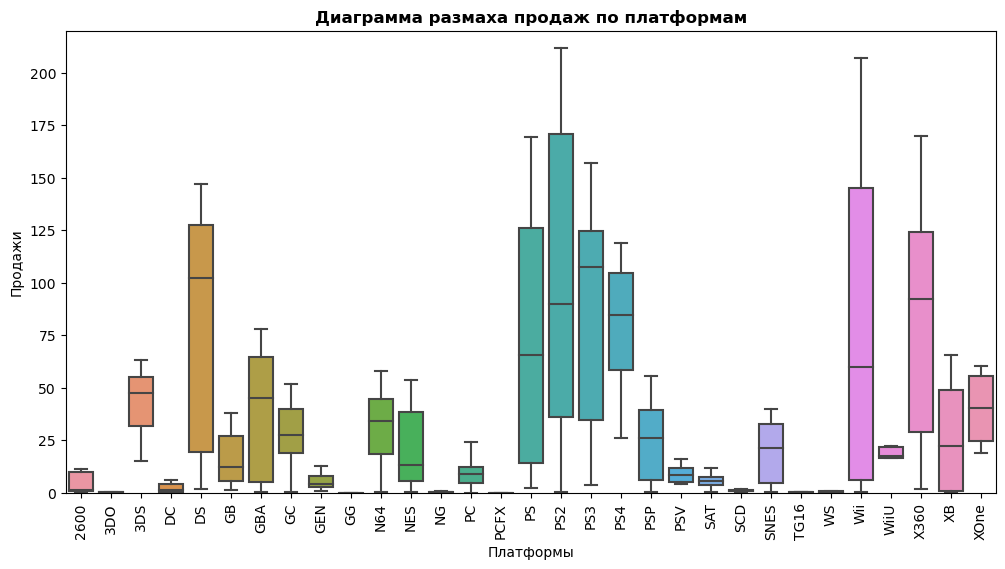

In [48]:
# построили boxplot продаж по платформам за все года
data_box = data.pivot_table(index=['platform', 'year_of_release'], 
                            values='total_sales', 
                            aggfunc='sum').reset_index()
plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='platform', 
                  y="total_sales",
                  showfliers=False,
                  data=data_box)
fig.axis(ymin=0, ymax=220)
plt.xticks(rotation=90)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.title('Диаграмма размаха продаж по платформам',
         fontsize=12, 
         weight='bold')
plt.show()

Из графиков можем наблюдать, что платформы живут 10-12 лет, далее им на замену приходят новыe, за исключением PC (игр на персональном компьютере). Популярным в свое время платформам NES, GB и GEN - пришли новые: DS, семество PS(PS, PS2, PS3), Wii, Х360 - ставили рекорды в отдельные года по продажам копий более 100 млн.копий. И им же уже пришли на замену новые платформы, от которых можем также ожидать высоких продаж. Платформы XOne, PS4, WiiU, 3DS появились несколько лет наз и в последние 3 года набирают обороты по продажам. 

Чтобы определить популярные платформы в текущее время и успешность игры закономерности остановимся в исследовании на последних 3 годах, в это время появились платформы и которые в середине своего жизненного цикла.

<a id ='8-bullet'></a>
### Данные по платформам за соответствующий актуальный период

Возьмем данные за соответствующий актуальный период. Выберем несколько потенциально прибыльных платформ.

In [49]:
# взяли данные за последние 3 года с 2014 по 2016 год
data_new = data[data['year_of_release'] > 2013]
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.680000
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.980000


In [50]:
# вывели информацию по полученному датафрейму
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float32
 5   eu_sales         1689 non-null   float32
 6   jp_sales         1689 non-null   float32
 7   other_sales      1689 non-null   float32
 8   critic_score     718 non-null    float32
 9   user_score       888 non-null    float32
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float32
dtypes: float32(7), int32(1), object(4)
memory usage: 118.8+ KB


В текущем датафрейме осталось 1689 строк.

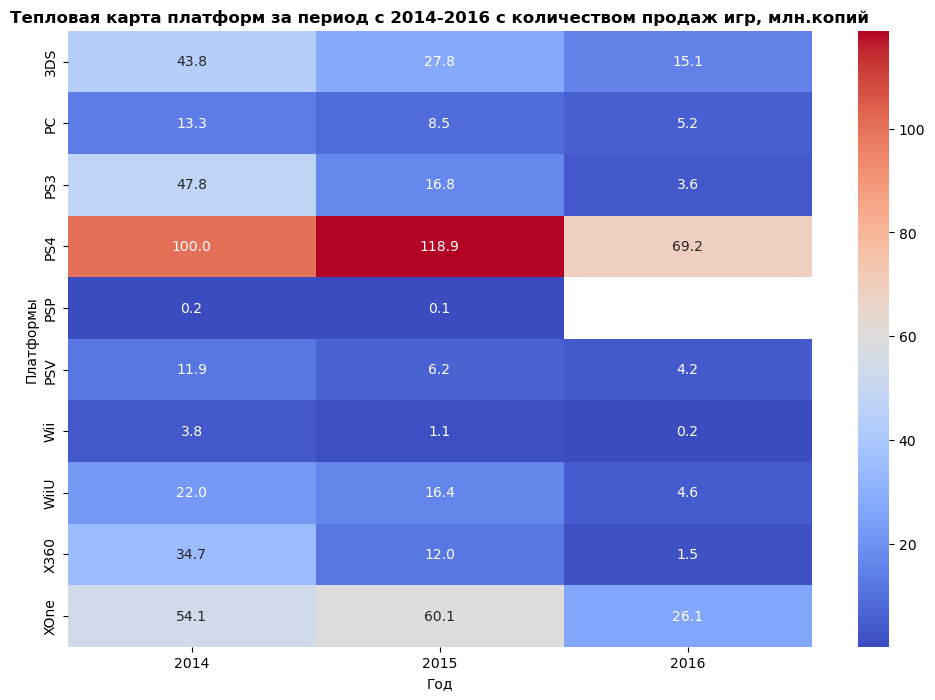

In [51]:
# построили тепловую карту присутствия платформ с продажами за актуальный период
data_new_platform = data_new.pivot_table(index='platform', 
                                 columns='year_of_release', 
                                 values='total_sales', 
                                 aggfunc='sum')
plt.subplots(figsize=(12, 8))
sns.heatmap(data_new_platform,
            annot=True,
            fmt='.1f',
            annot_kws={'size':10},
            cmap='coolwarm'
           )
plt.ylabel('Платформы')
plt.xlabel('Год')
plt.title('Тепловая карта платформ за период с 2014-2016 с количеством продаж игр, млн.копий',
         fontsize=12, 
         weight='bold')
plt.show()

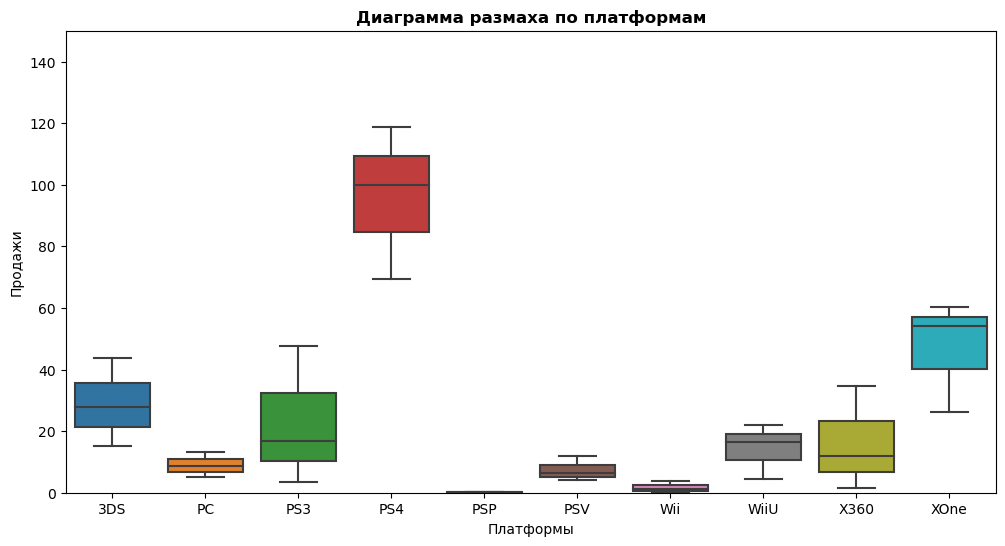

In [52]:
# построили boxplot продаж по платформам за 2014-2016 год
data_new_platform_box = data_new.pivot_table(index=['platform','year_of_release'], 
                                 values='total_sales', 
                                 aggfunc='sum').reset_index()
plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x='platform', 
                  y='total_sales', 
                  showfliers=False,
                  data=data_new_platform_box)
fig.axis(ymin=0, ymax=150)
plt.xticks(rotation=0)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.title('Диаграмма размаха по платформам',
         fontsize=12, 
         weight='bold')
plt.show()

Как и предположили на прошлом этапе выделяются следующие платформы 3DS, PS4, XOne и WiiU - медиана продаж у них выше остальных. Непосредственным лидером является платформа PS4. Сосредоточим внимание на данных платформах

In [53]:
# отфильтровали по перспективным платформам
data_new1 = data_new[data_new['platform'].isin(['3DS', 'PS4', 'WiiU', 'XOne'])]
data_new1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.680000
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.980000


In [54]:
# вывели сводные продажи по платформам за период 2014-2016 год
data_new1_pivot = data_new1.pivot_table(index='platform', 
                                        columns='year_of_release', 
                                        values='total_sales',
                                        aggfunc=['sum'],
                                        margins=True).reset_index()
data_new1_pivot.columns=['Платформа', 2014, 2015, 2016, 'Всего']
data_new1_pivot[data_new1_pivot.columns] = np.round(data_new1_pivot[data_new1_pivot.columns])
data_new1_pivot

,Платформа,2014,2015,2016,Всего
0,3DS,44.0,28.0,15.0,87.0
1,PS4,100.0,119.0,69.0,288.0
2,WiiU,22.0,16.0,5.0,43.0
3,XOne,54.0,60.0,26.0,140.0
4,All,220.0,223.0,115.0,558.0


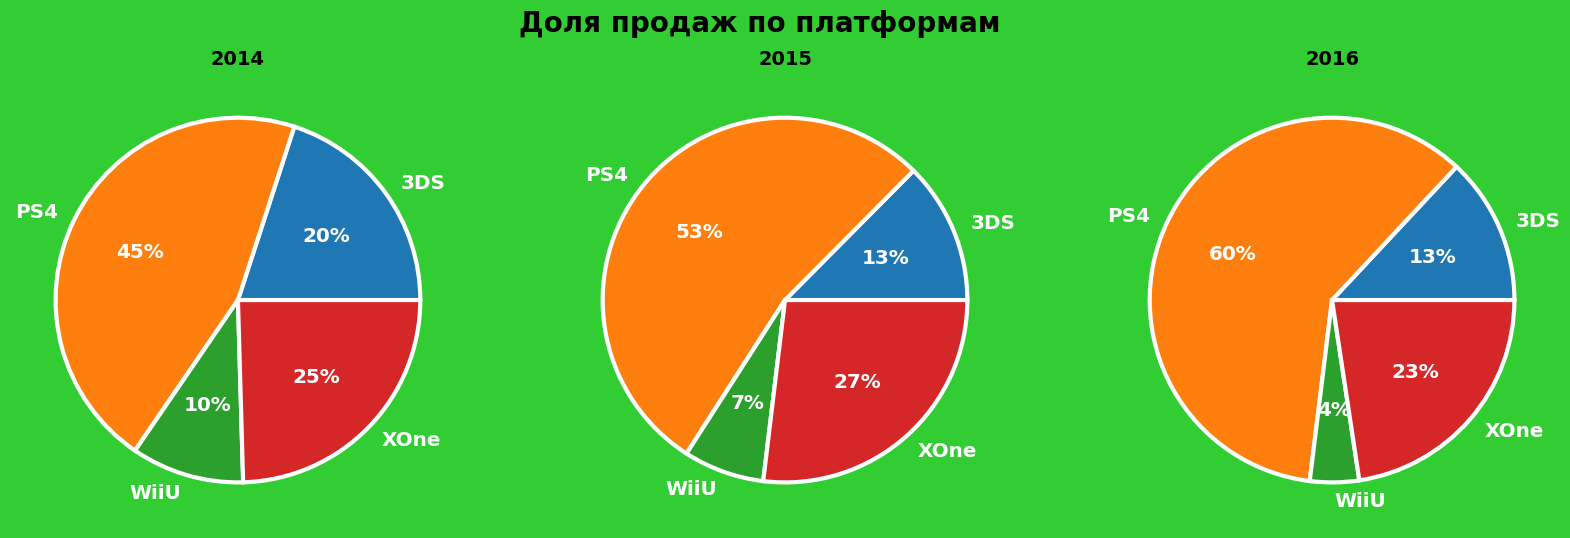

In [55]:
# нарисовали круговые диаграммы с долей продаж по каждому году
plt.figure(figsize=(20, 6),
          facecolor='limegreen')

plt.suptitle('Доля продаж по платформам',
            fontsize=20,
            weight='bold')

plt.subplot(1, 3, 1)
plt.pie(data_new1_pivot[0:4][2014],
        labels=data_new1_pivot[0:4]['Платформа'],
        autopct='%1.0f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('2014', 
          fontsize=14,
         weight='bold')

plt.subplot(1, 3, 2)
plt.pie(data_new1_pivot[0:4][2015],
        labels=data_new1_pivot[0:4]['Платформа'],
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('2015', 
          fontsize=14,
         weight='bold')

plt.subplot(1, 3, 3)
plt.pie(data_new1_pivot[0:4][2016],
        labels=data_new1_pivot[0:4]['Платформа'],
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('2016', 
          fontsize=14,
          weight='bold')

plt.show()

На данном этапе рассмотрели продажи по платформам за 2014-2015 года - из 10 платформ наиболее перспективными выдели 4,которые являются следующим поколением и которые начинают лидировать в продажах. Самой полулярной платформой является PS4, доля ее растет из-года в год, за ней следует платформа XOne.

<a id ='9-bullet'></a>
### Влияние на продажи платформы PS4 отзывы пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [56]:
#посчитали корреляцию по платформе PS4 между продажами и оценками критиков
print(
    f'''Корреляция между оценками критиков и продажами на платформе PS4 составляет \
{(data_new[data_new["platform"] == "PS4"]["total_sales"]
.corr(data_new[data_new["platform"] == "PS4"]["critic_score"])):.2f}''')

Корреляция между оценками критиков и продажами на платформе PS4 составляет 0.40


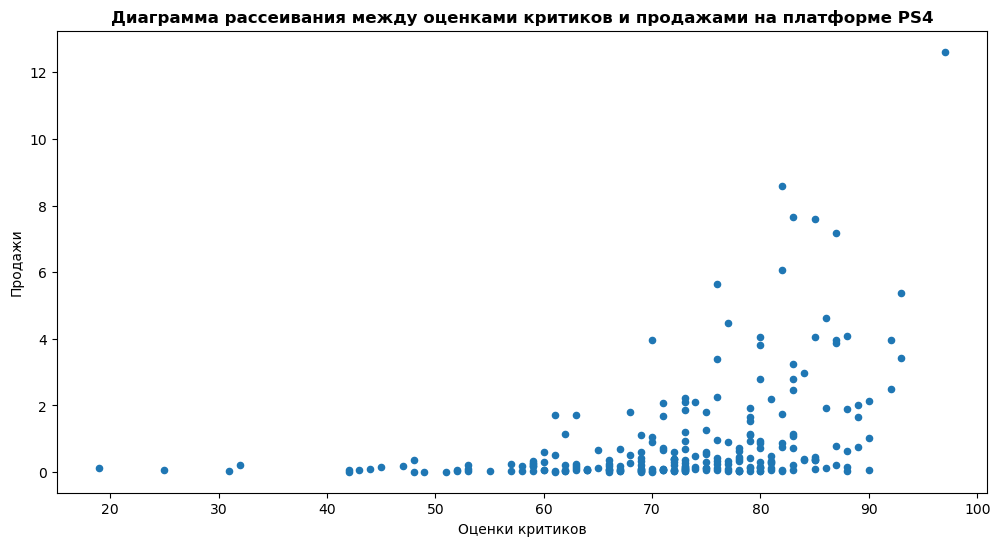

In [57]:
# нарисовали диаграмму рассеивания влияния оценок критиков на продажи
data_new[data_new['platform'] == 'PS4'].plot(kind='scatter',
                                     ylabel='Продажи',
                                     xlabel='Оценки критиков',
                                     x='critic_score', 
                                     y='total_sales',
                                     figsize=(12,6))
plt.title('Диаграмма рассеивания между оценками критиков и продажами на платформе PS4', 
          fontsize=12, 
          weight='bold')
plt.show();

In [58]:
#посчитали корреляцию по платформе PS4 между продажами и оценками пользователей
print(
    f'''Корреляция между оценками пользователей и продажами на платформе PS4 составляет \
{(data_new[data_new["platform"] == "PS4"]["total_sales"]
.corr(data_new[data_new["platform"] == "PS4"]["user_score"])):.2f}'''
)

Корреляция между оценками пользователей и продажами на платформе PS4 составляет -0.04


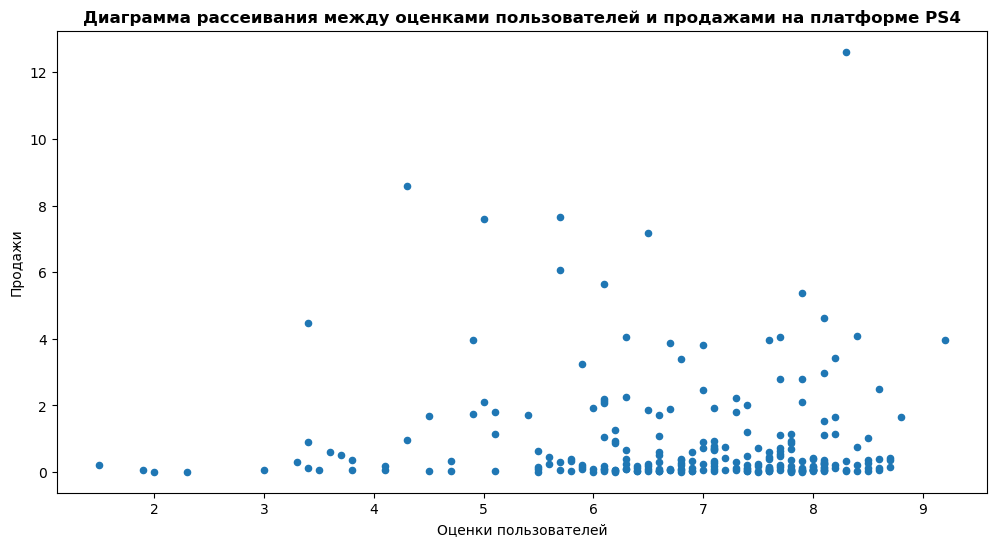

In [59]:
# нарисовали диаграмму рассеивания влияния оценок пользователей на продажи
data_new[data_new['platform'] == 'PS4'].plot(kind='scatter',
                                     ylabel='Продажи',
                                     xlabel='Оценки пользователей',
                                     x='user_score', 
                                     y='total_sales',
                                     figsize=(12,6))
plt.title('Диаграмма рассеивания между оценками пользователей и продажами на платформе PS4', 
          fontsize=12, 
          weight='bold')
plt.show();

Проверим как влияют оценки пользователей и критиков на продажи других платформ

In [60]:
#посчитали корреляцию по платформе XOne между продажами и оценками критиков
print(
    f'''Корреляция между оценками критиков и продажами на платформе XOne составляет \
{(data_new[data_new["platform"] == "XOne"]["total_sales"]
.corr(data_new[data_new["platform"] == "XOne"]["critic_score"])):.2f}''')

Корреляция между оценками критиков и продажами на платформе XOne составляет 0.43


In [61]:
#посчитали корреляцию по платформе XOne между продажами и оценками пользователей
print(
    f'''Корреляция между оценками пользователей и продажами на платформе XOne составляет \
{(data_new[data_new["platform"] == "XOne"]["total_sales"]
.corr(data_new[data_new["platform"] == "XOne"]["user_score"])):.2f}'''
)

Корреляция между оценками пользователей и продажами на платформе XOne составляет -0.07


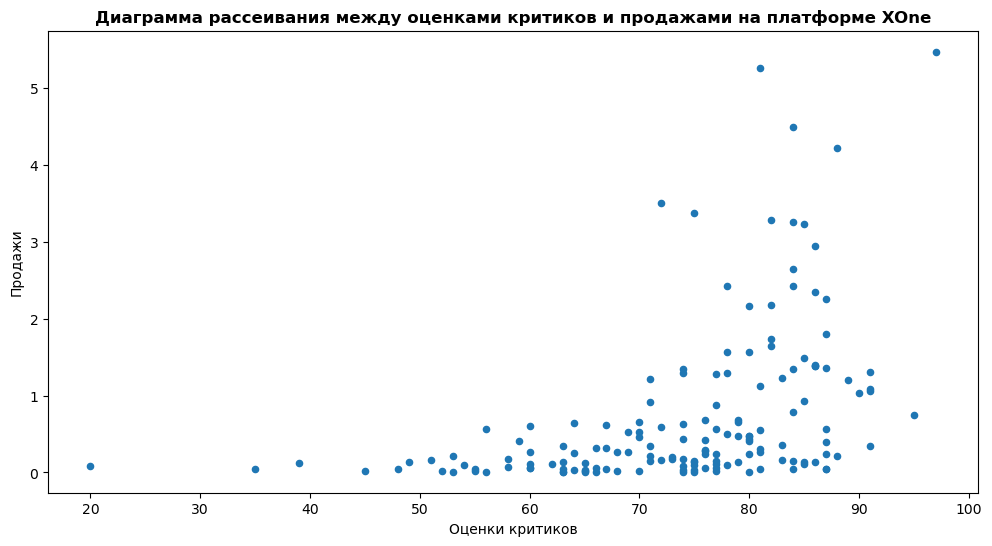

In [62]:
# нарисовали диаграмму рассеивания влияния оценок критиков на продажи
data_new[data_new['platform'] == 'XOne'].plot(kind='scatter',
                                     ylabel='Продажи',
                                     xlabel='Оценки критиков',
                                     x='critic_score', 
                                     y='total_sales',
                                     figsize=(12,6))
plt.title('Диаграмма рассеивания между оценками критиков и продажами на платформе XOne', 
          fontsize=12, 
          weight='bold')
plt.show();

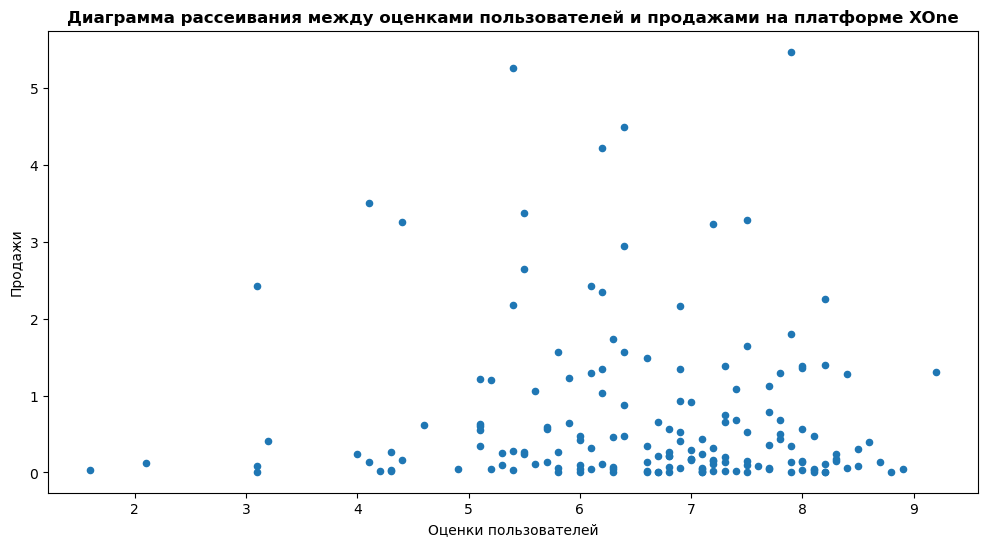

In [63]:
# нарисовали диаграмму рассеивания влияния оценок пользователей на продажи
data_new[data_new['platform'] == 'XOne'].plot(kind='scatter',
                                     ylabel='Продажи',
                                     xlabel='Оценки пользователей',
                                     x='user_score', 
                                     y='total_sales',
                                     figsize=(12,6))
plt.title('Диаграмма рассеивания между оценками пользователей и продажами на платформе XOne', 
          fontsize=12, 
          weight='bold')
plt.show();

In [64]:
#посчитали корреляцию по платформе 3DS между продажами и оценками критиков
print(
    f'''Корреляция между оценками критиков и продажами на платформе 3DS составляет \
{(data_new[data_new["platform"] == "3DS"]["total_sales"]
.corr(data_new[data_new["platform"] == "3DS"]["critic_score"])):.2f}''')

Корреляция между оценками критиков и продажами на платформе 3DS составляет 0.31


In [65]:
#посчитали корреляцию по платформе 3DS между продажами и оценками пользователей
print(
    f'''Корреляция между оценками пользователей и продажами на платформе 3DS составляет \
{(data_new[data_new["platform"] == "3DS"]["total_sales"]
.corr(data_new[data_new["platform"] == "3DS"]["user_score"])):.2f}'''
)

Корреляция между оценками пользователей и продажами на платформе 3DS составляет 0.22


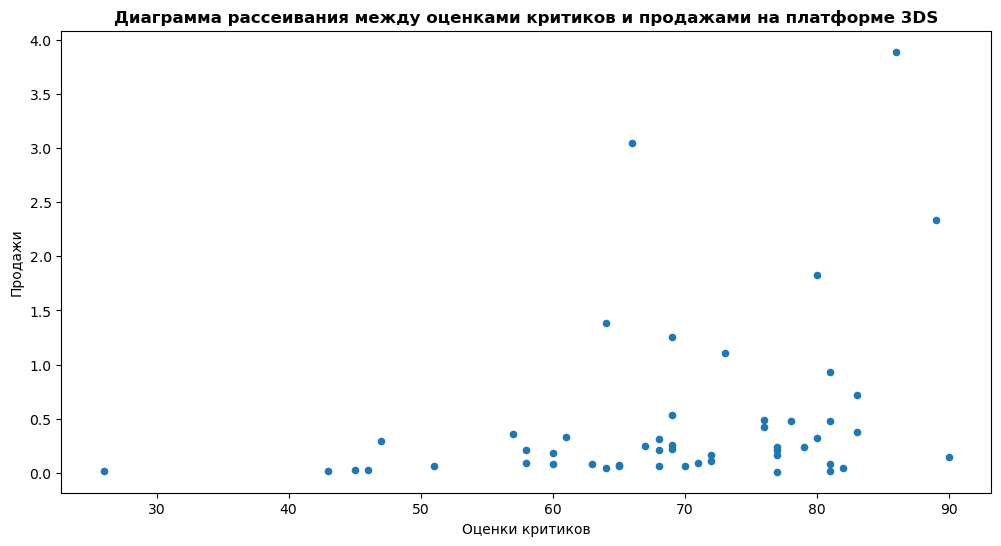

In [66]:
# нарисовали диаграмму рассеивания влияния оценок критиков на продажи
data_new[data_new['platform'] == '3DS'].plot(kind='scatter',
                                     ylabel='Продажи',
                                     xlabel='Оценки критиков',
                                     x='critic_score', 
                                     y='total_sales',
                                     figsize=(12,6))
plt.title('Диаграмма рассеивания между оценками критиков и продажами на платформе 3DS', 
          fontsize=12, 
          weight='bold')
plt.show();

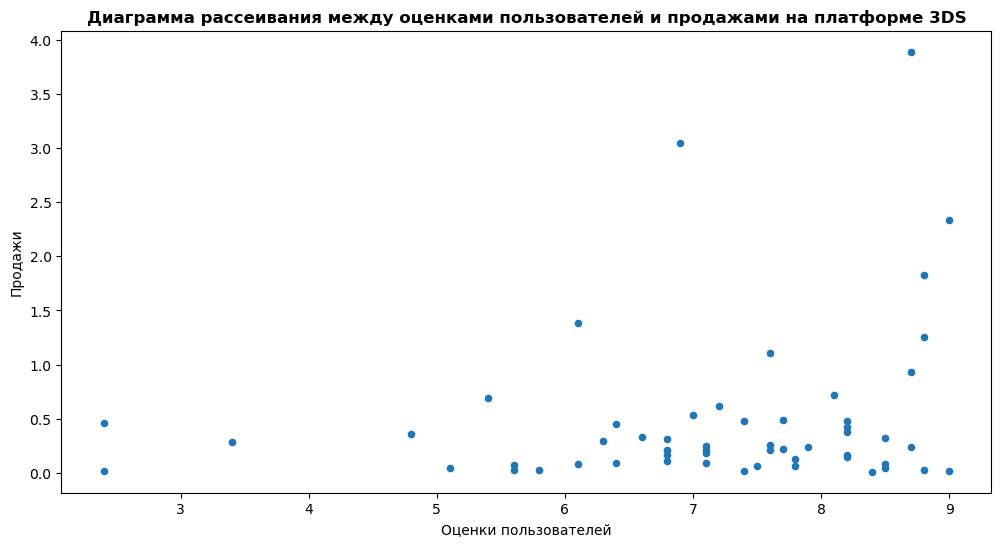

In [67]:
# нарисовали диаграмму рассеивания влияния оценок пользователей на продажи
data_new[data_new['platform'] == '3DS'].plot(kind='scatter',
                                     ylabel='Продажи',
                                     xlabel='Оценки пользователей',
                                     x='user_score', 
                                     y='total_sales',
                                     figsize=(12,6))
plt.title('Диаграмма рассеивания между оценками пользователей и продажами на платформе 3DS', 
          fontsize=12, 
          weight='bold')
plt.show();

In [68]:
#посчитали корреляцию по платформе WiiU между продажами и оценками критиков
print(
    f'''Корреляция между оценками критиков и продажами на платформе WiiU составляет \
{(data_new[data_new["platform"] == "WiiU"]["total_sales"]
.corr(data_new[data_new["platform"] == "WiiU"]["critic_score"])):.2f}''')

Корреляция между оценками критиков и продажами на платформе WiiU составляет 0.37


In [69]:
#посчитали корреляцию по платформе WiiU между продажами и оценками пользователей
print(
    f'''Корреляция между оценками пользователей и продажами на платформе WiiU составляет \
{(data_new[data_new["platform"] == "WiiU"]["total_sales"]
.corr(data_new[data_new["platform"] == "WiiU"]["user_score"])):.2f}'''
)

Корреляция между оценками пользователей и продажами на платформе WiiU составляет 0.41


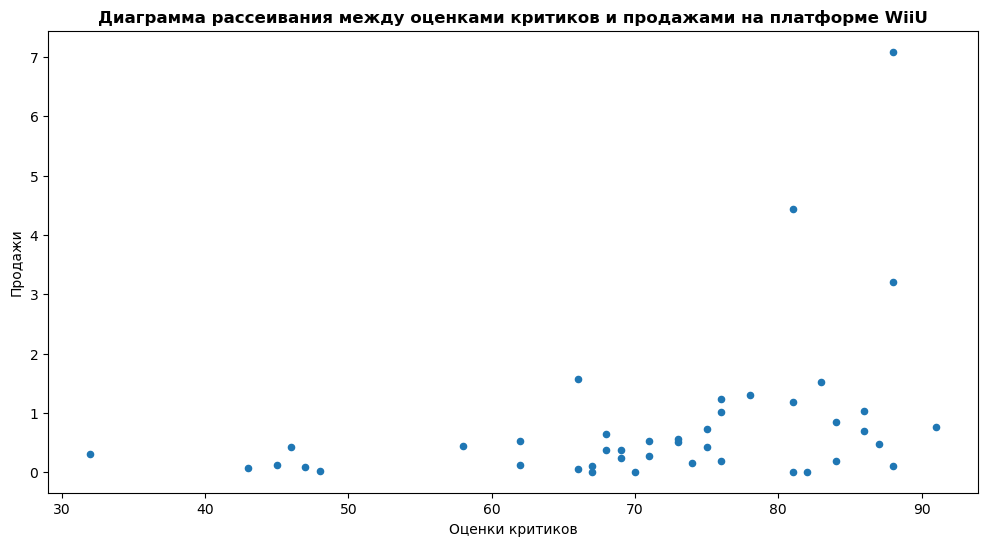

In [70]:
# нарисовали диаграмму рассеивания влияния оценок критиков на продажи
data_new[data_new['platform'] == 'WiiU'].plot(kind='scatter',
                                     ylabel='Продажи',
                                     xlabel='Оценки критиков',
                                     x='critic_score', 
                                     y='total_sales',
                                     figsize=(12,6))
plt.title('Диаграмма рассеивания между оценками критиков и продажами на платформе WiiU', 
          fontsize=12, 
          weight='bold')
plt.show();

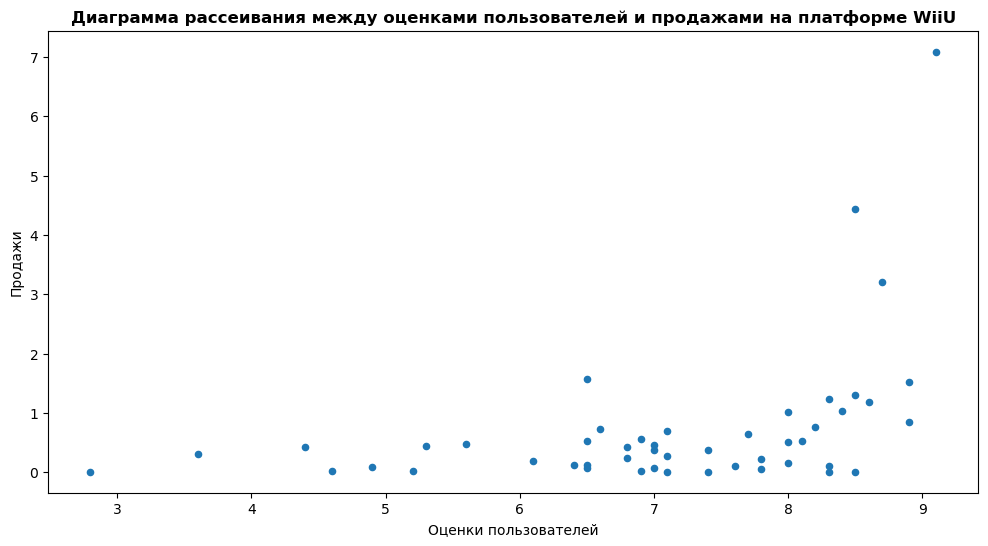

In [71]:
# нарисовали диаграмму рассеивания влияния оценок пользователей на продажи
data_new[data_new['platform'] == 'WiiU'].plot(kind='scatter',
                                     ylabel='Продажи',
                                     xlabel='Оценки пользователей',
                                     x='user_score', 
                                     y='total_sales',
                                     figsize=(12,6))
plt.title('Диаграмма рассеивания между оценками пользователей и продажами на платформе WiiU', 
          fontsize=12, 
          weight='bold')
plt.show();

Как видно из рассчета корреляции и диаграмм рассеивания между продажами и оценками пользователей отсутствует линейная связь между переменными, либо связь слабой степени выраженности. Уровень корряляции колеблеться от - 0.07 до 0.41. Оценки критиков наоборот, имеют связь между продажами и оценками экспертов для всех платформ слабой степени выраженности, уровень корреляции во всех случаях 0.31 - 0.43, чем выше оценки, тем выше уровень продаж.

<a id ='10-bullet'></a>
### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

In [72]:
#  построили сводную таблицу по жанрам и медианных продаж игр
data_genre = data_new.pivot_table(index='genre', 
                                  values='total_sales', 
                                  aggfunc='median')
data_genre['shape_sales_%'] = np.round(data_genre['total_sales'] / data_genre['total_sales'].sum() * 100)
data_genre.sort_values('total_sales', ascending=False, inplace=True)
data_genre

,total_sales,shape_sales_%
genre,,
Shooter,0.515,33.0
Sports,0.180,11.0
Platform,0.140,9.0
Fighting,0.125,8.0
Role-Playing,0.110,7.0
Simulation,0.100,6.0
Misc,0.090,6.0
Action,0.090,6.0
Racing,0.090,6.0


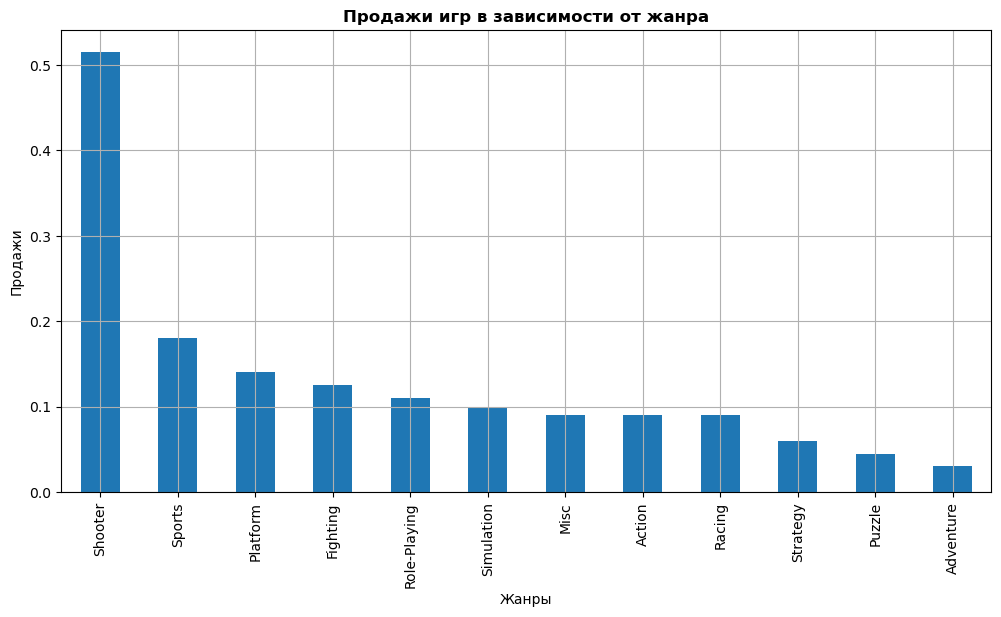

In [73]:
data_genre['total_sales'].plot(kind='bar', 
                                   figsize = (12, 6), 
                                   legend=False,
                                   grid=True)
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.title('Продажи игр в зависимости от жанра', 
          fontsize=12, 
          weight='bold')
plt.show()

Самыми продаваемыми играми были игры в жанре Shooter. В пятерке лидеров можем наблюдать также такие жанры как Sports, Platform, Fighting и Role-Playing.

## Шаг. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP): самые популярные платформы и самые популярные жанры

<a id ='11-bullet'></a>
### Самые популярные платформы (топ-5) в регионах

In [74]:
# сделали сводную таблицу в разбивке платформ и регионов
data_sales = data_new.pivot_table(
    index='platform', 
    values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='sum').reset_index()
data_sales

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,3DS,16.120001,44.240002,22.639999,3.68,86.680000
1,PC,17.969999,0.000000,7.230000,1.85,27.050001
2,PS3,25.539999,11.220000,22.049999,9.37,68.180000
3,PS4,130.039993,15.020000,98.610001,44.48,288.149994
4,PSP,0.000000,0.360000,0.000000,0.00,0.360000
5,PSV,3.530000,14.540000,2.520000,1.81,22.400000
6,Wii,2.590000,0.000000,2.080000,0.40,5.070000
7,WiiU,13.150000,7.310000,19.360001,3.16,42.980000
8,X360,15.490000,0.080000,28.299999,4.35,48.220001
9,XOne,46.250000,0.320000,81.269997,12.52,140.360001


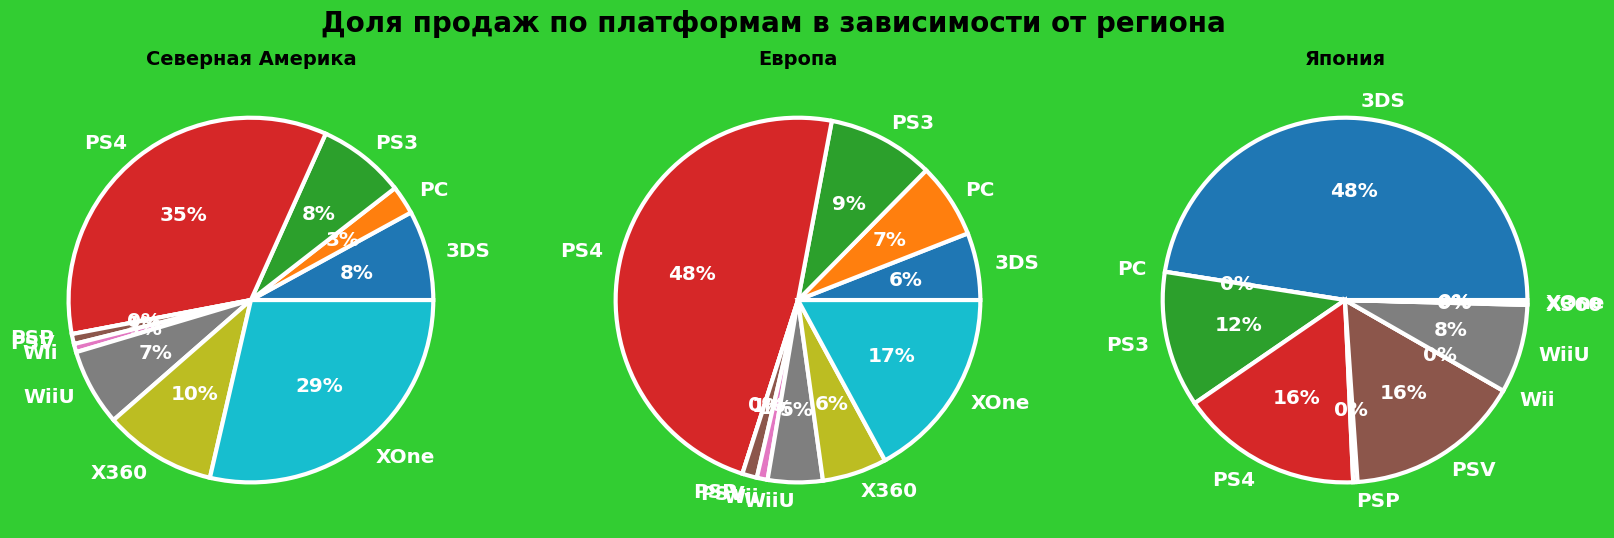

In [75]:
# нарисовали круговые диаграммы с долей продаж платформ по каждому региону
plt.figure(figsize=(20, 6),
          facecolor='limegreen')

plt.suptitle('Доля продаж по платформам в зависимости от региона',
            fontsize=20,
            weight='bold')

plt.subplot(1, 3, 1)
plt.pie(data_sales['na_sales'],
        labels=data_sales['platform'],
        autopct='%1.0f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Северная Америка', 
          fontsize=14,
         weight='bold')

plt.subplot(1, 3, 2)
plt.pie(data_sales['eu_sales'],
        labels=data_sales['platform'],
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Европа', 
          fontsize=14,
         weight='bold')

plt.subplot(1, 3, 3)
plt.pie(data_sales['jp_sales'],
        labels=data_sales['platform'],
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Япония', 
          fontsize=14,
          weight='bold')

plt.show()

Из диаграмм видно, что для регионов Северная Америнка и Европа ТОП5 совпадает: PS4, XOne, X360, PS3, 3DS. В Европе можно отдельно еще выделить платформу PC, сопостовимая доля с платформами X360 и 3DS. В Японии ТОП5 кардианально отличается: на первом месте платформа 3DS c долей 48%, затем идут платформы семейства PlayStation (PS4, PSV, PS3), на 5 месте платформа WiiU.

<a id ='12-bullet'></a>
### Самые популярные жанры (топ-5) в регионах

In [76]:
# сделали сводную таблицу в разбивке жанров и регионов
data_genre = data_new.pivot_table(
    index='genre', 
    values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='median').reset_index()
data_genre

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,0.020,0.01,0.010,0.010,0.090
1,Adventure,0.000,0.01,0.000,0.000,0.030
2,Fighting,0.020,0.03,0.040,0.010,0.125
3,Misc,0.010,0.01,0.010,0.000,0.090
4,Platform,0.055,0.00,0.075,0.020,0.140
5,Puzzle,0.000,0.03,0.000,0.000,0.045
6,Racing,0.050,0.00,0.030,0.010,0.090
7,Role-Playing,0.010,0.05,0.020,0.010,0.110
8,Shooter,0.220,0.00,0.220,0.055,0.515
9,Simulation,0.030,0.00,0.000,0.000,0.100


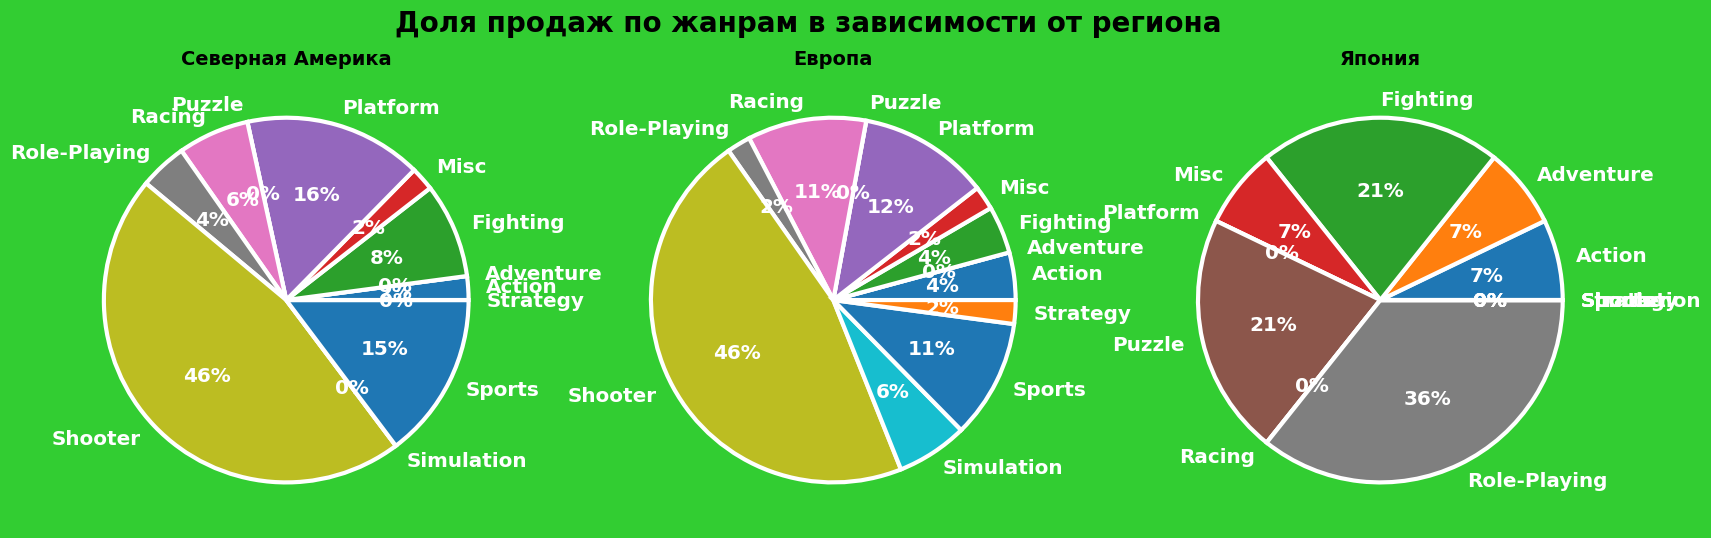

In [77]:
# нарисовали круговые диаграммы с долей медианных продаж по жанрам в каждом регионе
plt.figure(figsize=(20, 6),
          facecolor='limegreen')

plt.suptitle('Доля продаж по жанрам в зависимости от региона',
            fontsize=20,
            weight='bold')

plt.subplot(1, 3, 1)
plt.pie(data_genre['na_sales'],
        labels=data_genre['genre'],
        autopct='%1.0f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Северная Америка', 
          fontsize=14,
         weight='bold')

plt.subplot(1, 3, 2)
plt.pie(data_genre['eu_sales'],
        labels=data_genre['genre'],
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Европа', 
          fontsize=14,
         weight='bold')

plt.subplot(1, 3, 3)
plt.pie(data_genre['jp_sales'],
        labels=data_genre['genre'],
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Япония', 
          fontsize=14,
          weight='bold')

plt.show()

Из диаграмм видно, что для регионов Северная Америнка и Европа ТОП5 по жанрам почти совпадает: В Японии ТОП5 кардианально отличается: вместо жанра Shooter играют в жанре Role-Playing.

Северная Америнка ТОП-5: Shooter, Platform, Sports, Fighting, Racing

          Еврропа ТОП-5: Shooter, Platform, Sports, Simulation, Racing
          
           Япония ТОП-5: Role-Playing, Fighting, Puzzle, Action, Adventure

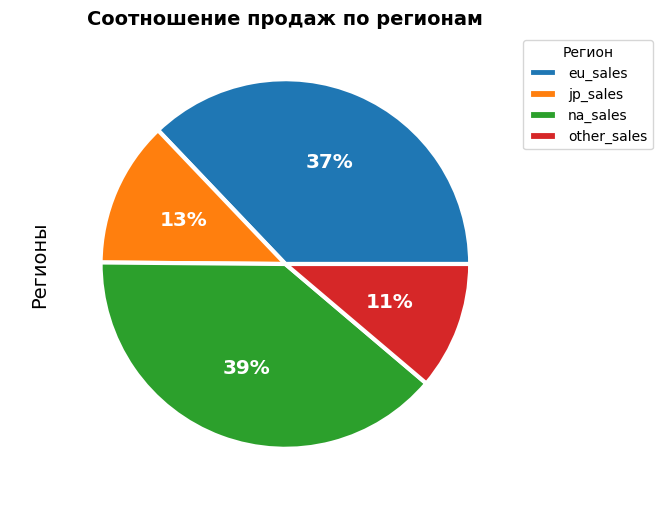

In [78]:
# сделали круговую диаграмму соотношения продаж в каждом регионе
data_sales1 = data_new.pivot_table(
    index='platform', 
    values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='sum',
    margins=True).reset_index()
data_sales1 = data_sales1.loc[10, ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']]
data_sales1.plot(kind='pie', 
                 autopct='%1.0f%%', 
                 figsize=(12, 6),
                 wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                 textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.ylabel('Регионы', fontsize=14)
plt.title('Cоотношение продаж по регионам', 
          fontsize=14,
          weight='bold')
plt.legend(title='Регион', bbox_to_anchor=(1, 1))
plt.show()

На диаграмме видно, что основные продажи идут в регионах NA и EU, c долей 39% и 37% соответственно.

<a id ='13-bullet'></a>
### Влияние рейтинга ESRB на продажи в отдельном регионе

In [79]:
# сделали сводную таблицу в разбивке жанров и регионов
data_rating = data_new.pivot_table(
    index='rating', 
    values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    aggfunc='sum').reset_index()
data_rating

,rating,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,E,58.060001,8.940000,50.740002,15.39,133.130005
1,E10+,26.160000,4.460000,33.230000,7.83,71.680000
2,M,93.440002,8.010000,96.419998,28.67,226.539993
3,T,34.070000,14.780000,38.950001,11.33,99.129997
4,unknown,58.950001,56.900002,64.720001,18.40,198.970001


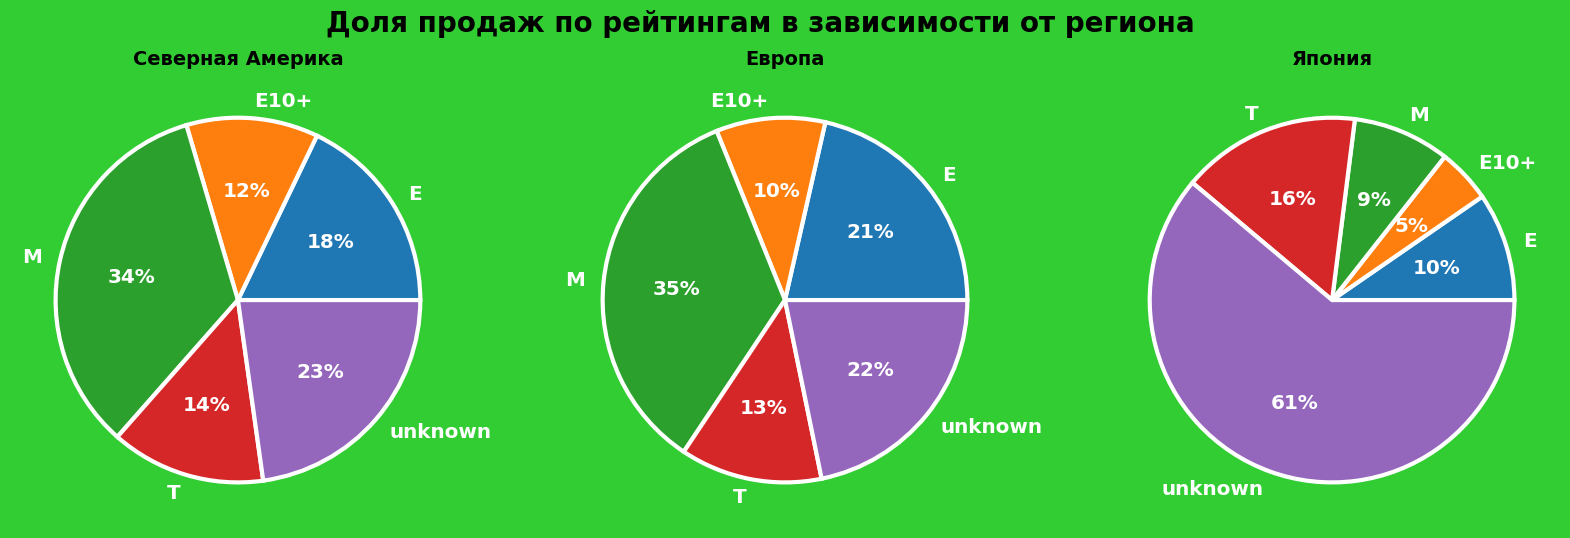

In [80]:
# нарисовали круговые диаграммы с долей продаж по жанрам в каждом регионе
plt.figure(figsize=(20, 6),
          facecolor='limegreen')

plt.suptitle('Доля продаж по рейтингам в зависимости от региона',
            fontsize=20,
            weight='bold')

plt.subplot(1, 3, 1)
plt.pie(data_rating['na_sales'],
        labels=data_rating['rating'],
        autopct='%1.0f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Северная Америка', 
          fontsize=14,
         weight='bold')

plt.subplot(1, 3, 2)
plt.pie(data_rating['eu_sales'],
        labels=data_rating['rating'],
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Европа', 
          fontsize=14,
         weight='bold')

plt.subplot(1, 3, 3)
plt.pie(data_rating['jp_sales'],
        labels=data_rating['rating'],
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color': 'white', 'fontweight': 'bold'})
plt.title('Япония', 
          fontsize=14,
          weight='bold')

plt.show()

В Северной Америке и Европе продажи в зависимости от рейтинга ESRB почти совпадают. В Японии преобладающее играют в игры, которые не получают рейтинг ESRB.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности которой — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Рынки игр Северной Америки и Европы схожи, предъявляют одни и те же требования. 

Возрастными рейтингами для консольных игр в Японии занимается CERO – некоммерческая организация, основанная в июле 2002-го. До 2006 года ее система состояла из четырех категорий – А («для всех возрастов»), B («старше 12»), С («старше 15») и Z («от 18 и выше») – и первые поправки случились только благодаря GTA 3. Поэтому для продажи игр в Японии нужно получать рейтинг, данной страны.


## Шаг Проверка гипотез

<a id='14-bullet'></a>
### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [81]:
# вывели платформы, которые есть в датафрейме - PC и  Xbox One в их числе
data_new['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [82]:
# посчитали количество всего оценок пользователей по всем платформам
data_new[~data_new['user_score'].isna()]['user_score'].count()

888

In [83]:
# записали в переменную data_score заполненные оценки пользователей по играм
data_score = data_new[~data_new['user_score'].isna()]
data_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.660000
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.600000
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.170000


In [84]:
# сделали выборку по платформе Xbox One
data_xbox = data_score[data_score['platform'].isin(['XOne'])]
data_xbox.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [85]:
# сделали выборку по платформе PC
data_pc = data_score[data_score['platform'].isin(['PC'])]
data_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2303,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
2784,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85.0,5.9,M,0.73


In [86]:
alpha = 0.01 # задали критический уровень статистической значимости на уровне 1%
# если p-value окажется меньше него - отвергнем гипотезу

In [87]:
#  Средние пользовательские рейтинги платформ Xbox One и PC
print(
    f'Cредний пользовательский рейтинг РС: \
{np.round(np.mean(data_pc["user_score"]))}'
)
print(
    f'Cредний пользовательский рейтинг Xbox: \
{np.round(np.mean(data_xbox["user_score"]))}'
)
print(
    f'Количество пользовательских оценок РС: \
{data_pc["user_score"].count()}'
)
print(
    f'Количество пользовательских оценок Xbox: \
{data_xbox["user_score"].count()}'
)

Cредний пользовательский рейтинг РС: 6.0
Cредний пользовательский рейтинг Xbox: 7.0
Количество пользовательских оценок РС: 122
Количество пользовательских оценок Xbox: 165


In [88]:
# создали двухвыборочный t-тест 
# нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# альтернативная гипотеза - рейтинги разные
results_duration = st.ttest_ind(
    data_pc['user_score'],
    data_xbox['user_score'],
    alternative='two-sided'
)
print(
    'p-значение ("вероятность получить наблюдаемое значение или ещё более далёкое от него"):', \
results_duration.pvalue
) # вывели полученное p-значение
if results_duration.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение ("вероятность получить наблюдаемое значение или ещё более далёкое от него"): 0.10450648833224654
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние оценки пользоватлей неодинаковы, с вероятностью почти 10% такое или большее различие можно получить случайно. Эта вероятность больше, чем критический уровень статистической значимости, чтобы делать вывод о различии между средними оценками.

<a id='15-bullet'></a>
### Гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [89]:
# вывели жанры, которые есть в датафрейме, Action и Sports в их числе
data_new['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [90]:
#сделали выборку по жанру Action
data_action = data_score[data_score['genre'] == 'Action']
data_action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.470000
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.620000
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.050000
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.960000


In [91]:
#сделали выборку по жанру Sports
data_sports = data_score[data_score['genre'] == 'Sports']
data_sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87


In [92]:
#  Средние пользовательские рейтинги жанров Action и Sports
print(
    f'Cредний пользовательский рейтинг жанра Action: \
{np.round(np.mean(data_action["user_score"]))}'
)
print(
    f'Cредний пользовательский рейтинг жанра Sports: \
{np.round(np.mean(data_sports["user_score"]))}'
)
print(
    f'Количество пользовательских оценок жанра Action: \
{data_action["user_score"].count()}'
)
print(
    f'Количество пользовательских оценок жанра Sports: \
{data_sports["user_score"].count()}'
)

Cредний пользовательский рейтинг жанра Action: 7.0
Cредний пользовательский рейтинг жанра Sports: 5.0
Количество пользовательских оценок жанра Action: 297
Количество пользовательских оценок жанра Sports: 127


In [93]:
# создали двухвыборочный t-тест 
# нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) 
# и Sports (англ. «спортивные соревнования») одинаковые
# альтернативная гипотеза - средние пользовательские рейтинги жанров разные
results_duration = st.ttest_ind(
    data_action['user_score'],
    data_sports['user_score'],
    alternative='two-sided'
)
print(
    'p-значение ("вероятность получить наблюдаемое значение или ещё более далёкое от него"):', \
results_duration.pvalue
) # вывели полученное p-значение
if results_duration.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение ("вероятность получить наблюдаемое значение или ещё более далёкое от него"): 2.871146400695882e-19
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, с вероятностью почти близкой к нулю такое или большее различие в оценках пользователей рассматриваемых жанров можно получить случайно. Это явно слишком маленькая вероятность, чтобы делать вывод о том, что пользовательские оценки жанров равны. Отвергли нулевую гипотезу в пользу альтернативной, о том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<a id='16-bullet'></a>
## Общий вывод

Для проведения исследования были получены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы за период с 1980 по 2016 год. Необходимо было определить платформы и жанры, на которых нужно сосредоточиться отделу маркетинга, чтобы спланировать рекламные кампании.

В полученном датафрейме провели предобработку данных: заполнили и удалили пропущенные значения, заменили названия столбцов, преобразовали данные в нужный тип данных.

На этапе исследовательского анализа данных определили, что платформы живут в среднем 10 лет, далее их заменяют на более продвинутые и улучшенные. Для определения платформ и жанров, на которых нужно сосредоточиться отделу маркетинга выбрали период за 2014-2016 год, т.к. он более близок и релевантен в данных, на основе него можно определит потенциально популярные продукты. Анализ данного периода показал, что внимание привлекают 4 платформы, которые находятся в середине своего жизненного цикла и набирают обороты по продажам: 3DS, PS4, XOne и WiiU. Самой популярной является платформа PS4. Также определили жанры, в которые играют пользователи: самыми продаваемыми играми были игры в жанре Shooter. В пятерке лидеров можем наблюдать также такие жанры как Sports, Platform, Fighting и Role-Playing..

В данных рассматривали пользователей с 4 регионов: Северная Америка, Европа, Япония и другие регионы. На Европу и Северную Америку приходится почти 80 % всех продаж. Топ5 платформ и жанров в данных регионах почти совпадают. Отдельно стоящий регион Япония, в по жанрам и в платформах Японцы отличаются, отдают предпочтение платформе 3DS и играют в жанре Role-Playing. 

Из рассчета корреляции и диаграмм рассеивания выявили между прожами и оценками пользователей и критиков отсутствующую линейную связь между переменными, либо связь слабой степени выраженности.

В Северной Америке и Европе продажи в зависимости от рейтинга ESRB почти совпадают. В Японии преобладающее играют в игры, которые не получают рейтинг ESRB.

Проверили гипотезы. 

- При уровне статистической значимости в 1 % не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, в пользу альтернативной гипотезы, что рейтинги разные.

- При уровне статистической значимости в 1 % отвергли гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые, в пользу альтернативной гипотезы, что рейтинги разные.

Отделу маркетинга рекомендовано сосредоточить рекламные компании вокруг игр, которые выпускаются на платформах PS4, XOne, 3DS, и WiiU в жанрах Shooter, Sports.